In [ ]:
from tensorflow.keras import callbacks, optimizers
import tensorflow as tf
from tensorflow import keras

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_data_path = '/content/drive/MyDrive/Data_main/DATASET/TRAIN'
test_data_path = '/content/drive/MyDrive/Data_main/DATASET/TEST'

In [ ]:
class_names= ['Crash','Fog','No seat belt','Potholes','Rain/Slippery']

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
train_datagen = ImageDataGenerator(rescale =1./255, rotation_range=40, width_shift_range=0.2, height_shift_range= 0.2, shear_range=0.2,
                                   zoom_range=0.2, horizontal_flip= True, fill_mode= 'nearest')
test_datagen = ImageDataGenerator(rescale =1./255, rotation_range=40, width_shift_range=0.2, height_shift_range= 0.2, shear_range=0.2,
                                   zoom_range=0.2, horizontal_flip= True, fill_mode= 'nearest')
train_set= train_datagen.flow_from_directory('/content/drive/MyDrive/Data_main/DATASET/TRAIN',
                                                target_size= (200,200),
                                                batch_size= 3,
                                                class_mode ='categorical')
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Data_main/DATASET/TEST',
                                            target_size= (200,200),
                                            batch_size =3,
                                            class_mode = 'categorical')

Found 382 images belonging to 5 classes.
Found 121 images belonging to 5 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200,200,3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(5, activation= 'softmax')
])


model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer= 'adam', metrics=['accuracy'])

model_fit = model.fit(train_set, epochs=10, steps_per_epoch=len(train_set), validation_data = test_set)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 198, 198, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 99, 99, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 97, 97, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 46, 46, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 33856)            

In [ ]:
test_set.class_indices

{'CRASH': 0, 'FOG': 1, 'NO SEAT BELT': 2, 'POTHOLES': 3, 'RAIN': 4}

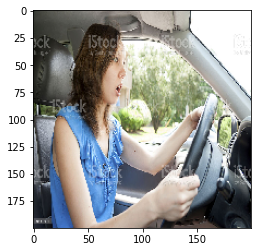


[[0. 0. 1. 0. 0.]]


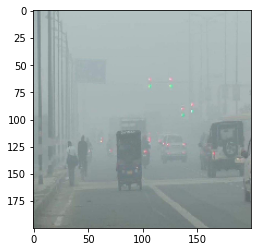


[[0. 1. 0. 0. 0.]]


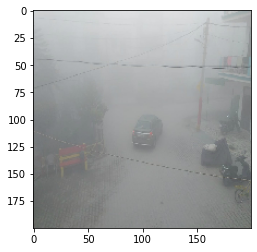


[[0. 1. 0. 0. 0.]]


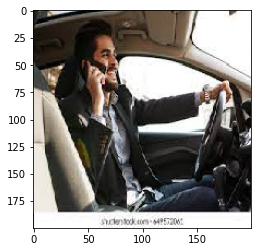


[[0. 0. 1. 0. 0.]]


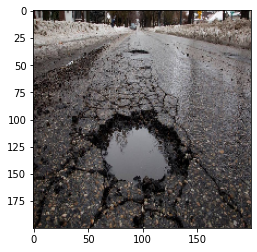


[[0. 0. 0. 1. 0.]]


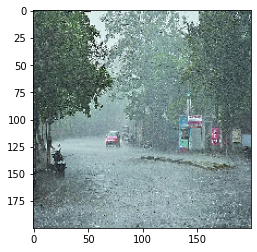


[[0. 0. 0. 1. 0.]]


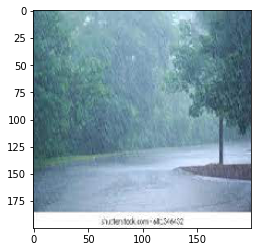


[[0. 0. 0. 0. 1.]]


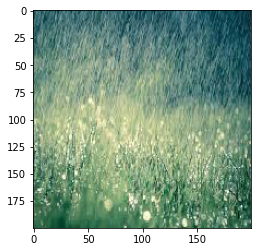


[[0. 0. 0. 0. 1.]]


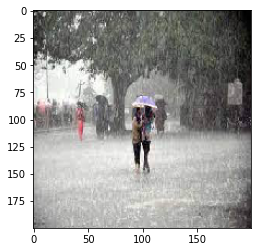


[[0. 0. 0. 0. 1.]]


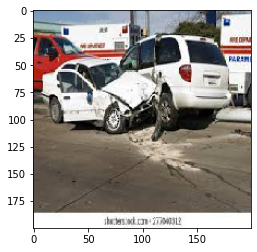


[[1. 0. 0. 0. 0.]]


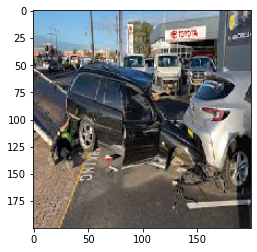


[[1. 0. 0. 0. 0.]]


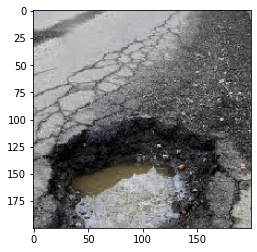


[[1.4523503e-32 0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00]]


In [ ]:
import os
from tensorflow.keras.preprocessing import image
dir_path='/content/drive/MyDrive/Data_main/DATASET/VALIDATION/MIXED'
for i in os.listdir(dir_path):
  img = image.load_img(dir_path+'//'+i, target_size=(200,200))
  plt.imshow(img)
  plt.show()

  X= image.img_to_array(img)
  X= np.expand_dims(X, axis=0)
  images= np.vstack([X])
  classes = model.predict(images, batch_size=10)
  print()
  print(classes)

# New section

In [ ]:
early_stop= callbacks.EarlyStopping (monitor='val_loss', patience= 5, mode='min')
save_ck= callbacks.ModelCheckpoint('enigma.hdf5', monitor='val_loss', mode='min')

In [ ]:
model.fit(train_set, batch_size= 3, validation_data= test_set, callbacks=[early_stop,save_ck], epochs= 10)

Epoch 1/10
128/128 [==============================] - 33s 261ms/step - loss: 0.5967 - accuracy: 0.7618 - val_loss: 0.6941 - val_accuracy: 0.7355
Epoch 2/10
128/128 [==============================] - 33s 261ms/step - loss: 0.6188 - accuracy: 0.7565 - val_loss: 0.8241 - val_accuracy: 0.6694
Epoch 3/10
128/128 [==============================] - 34s 263ms/step - loss: 0.6017 - accuracy: 0.7932 - val_loss: 0.7377 - val_accuracy: 0.7273
Epoch 4/10
128/128 [==============================] - 33s 261ms/step - loss: 0.5560 - accuracy: 0.7958 - val_loss: 0.7303 - val_accuracy: 0.7025
Epoch 5/10
128/128 [==============================] - 33s 259ms/step - loss: 0.6650 - accuracy: 0.7618 - val_loss: 0.7725 - val_accuracy: 0.7025
Epoch 6/10
128/128 [==============================] - 33s 258ms/step - loss: 0.4757 - accuracy: 0.8168 - val_loss: 0.9186 - val_accuracy: 0.6942
